[8635.02659574]
[8635.02659574]


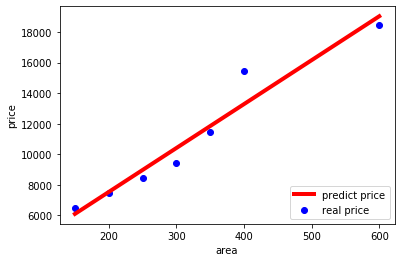

In [27]:
#线性回归预测房价
import pandas as pd
from io import StringIO
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

#房屋面积与价格的历史数据
csv_data =  'square_feet,price\n150,6450\n200,7450\n250,8450\n300,9450\n350,11450\n400,15450\n600,18450\n'
#读入dataframe
df = pd.read_csv(StringIO(csv_data))
#values.rehape(-1, 1)把数组转换成一列
x = df['square_feet'].values.reshape(-1, 1)
y = df['price']

#建立线性回归模型
"""
补充代码
"""
regr = linear_model.LinearRegression()

#拟合
regr.fit(x, y)
a, b = regr.coef_, regr.intercept_
#给出带预测的面积
area = 238.5
#方式1：根据直线方程计算价格,并输出
"""
补充代码
"""
print(a * area + b)

#方式2：根据sklearn中线性回归模型预测
"""
补充代码
"""
print(regr.predict(area))

#画图
#1.真实的点
plt.scatter(x, y, color='blue', label='real price')
#2.拟合的直线
plt.plot(x, regr.predict(x), color='red', linewidth=4, label='predict price')
plt.xlabel('area')
plt.ylabel('price')
plt.legend(loc='lower right')
plt.show()


(7,)
(7,)


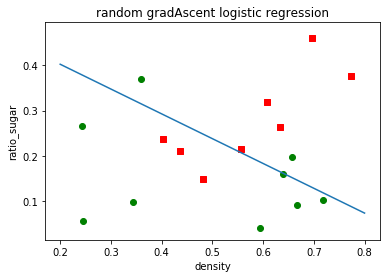

In [16]:
#利用逻辑回归对西瓜分类
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt


#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#梯度上升函数
def gradAscent(dataMat, labelMat):
    m,n = shape(dataMat)
    print(m, n)
    alpha = 0.1
    maxCycles = 500
    weights = array(ones((n, 1)))
    for k in range(maxCycles):
        """
        按照实验原理描述的方法迭代权重
        补充代码
        """
        delta = array(zeros((1, n)))
        for i in range(m):
            delta += np.reshape((labelMat[i] - sigmoid(np.dot(np.reshape(weights, 3), dataMat[i]))) * dataMat[i], 3)
        delta *= alpha
        weights += np.reshape(delta, (n, 1))
    return weights

#随机梯度上升
def randomgradAscent(dataMat, label, numIter=50):
    m,n = shape(dataMat)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            #迭代次数越多，学习率越小
            alpha = 40/(1.0+j+i)+0.2
                        
            """
            补充随机梯度上升部分迭代代码
            random产生随机数，用于数据索引
            """
            index = random.choice(dataIndex)
            dataIndex.remove(index)
            weights += np.asarray((labelMat[index] - sigmoid(np.dot(weights, dataMat[index]))) * dataMat[index]

    return weights

#画图
def plotBestFit(weights):
    m = shape(dataMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(m):
        if labelMat[i] == 1:
            xcord1.append(dataMat[i, 1])
            ycord1.append(dataMat[i, 2])
        else:
            xcord2.append(dataMat[i, 1])
            ycord2.append(dataMat[i, 2])
    plt.figure(1)
    ax = plt.subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, c='green')
    x = arange(0.2, 0.8, 0.1)
    y = array((-weights[0] - weights[1] * x)/weights[2])
    print(shape(x))
    print(shape(y))
    plt.sca(ax)
    #plt.plot(x, y[0])   #gradAscent
    plt.plot(x, y)  #randmgradAscent
    plt.xlabel('density')
    plt.ylabel('ratio_sugar')
    #plt.title('gradAscent logistic regression')
    plt.title('random gradAscent logistic regression')
    plt.show()

#读入csv文件数据
df = pd.read_csv('/data/shixunfiles/03d07802327d2fae5cbde9b1466fe53e_1582714323718.csv')
m, n = shape(df)
#df的第一列为index，在实验原理中该列的值应当为1，所以采用“idx”索引df对其修改
df['idx'] = ones((m, 1))
dataMat = array(df[['idx', 'idensity', 'ratio_sugar']].values[:, :])
labelMat = mat(df['label'].values[:]).transpose()
#weights = gradAscent(dataMat, labelMat)
weights = randomgradAscent(dataMat, labelMat, numIter=10)
plotBestFit(weights)

Training set score:0.8964083375595259
riddge.coef_:[ 0.04458399  0.19649066 -0.00278   ]
ridge.intercept_:2.9950025696747
MSE=  4.402027062786833
RMSE=  2.098100822836413


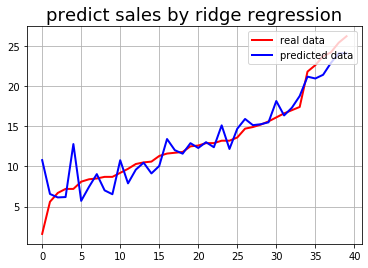

[[0.052757   0.23272725 0.01358251]
 [0.05275734 0.23272144 0.01358472]
 [0.05275767 0.23271563 0.01358692]
 ...
 [0.05766552 0.15935158 0.03654451]
 [0.0576657  0.15934924 0.03654504]
 [0.05766588 0.15934689 0.03654557]]


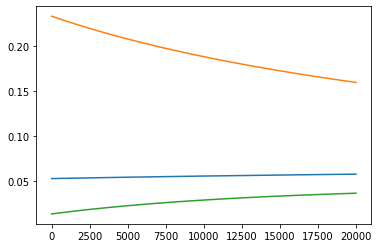

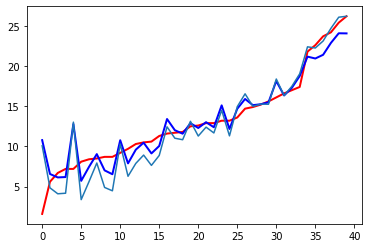

In [31]:
#岭回归预测销售额
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#岭回归预测销售额
data = pd.read_csv('/data/shixunfiles/f4a77266e4adb25e4ab168f994f6a7e6_1582712806305.csv')
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
#划分数据集，80%用于训练数据集，20%用于测试数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

#sklearn库中岭回归模型
r = Ridge()
ridge = r.fit(x_train, y_train)
print('Training set score:{}'.format(ridge.score(x, y)))
print('riddge.coef_:{}'.format(ridge.coef_))
print('ridge.intercept_:{}'.format(ridge.intercept_))
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_predict = r.predict(x_test)
#计算测试集上的均方误差
mse = np.average((y_predict - np.array(y_test)) ** 2)
#计算测试集上的均方根误差
rmse = np.sqrt(mse)
print('MSE= ', mse)
print('RMSE= ', rmse)
#绘制岭回归销售额和真实销售额折线图
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'real data')
plt.plot(t, y_predict, 'b-', linewidth=2, label=u'predicted data')
plt.legend(loc='upper right')
plt.title(u'predict sales by ridge regression', fontsize=18)
plt.grid(b=True)
plt.show()
#自己编写岭回归算法
x_T = np.transpose(x_train)
num = 20000
k_mat = np.linspace(-10000, num-1-10000, num=num)
beta = np.zeros([num, 3])
for k in range(num):
    """
    根据公式β ̂(k)=[(X^T X+kI)]^(-1) X^T Y求解系数
    补充代码
    """
    beta[k] = np.asmatrix((x_T.dot(x_train) + np.diag([k]*3)).values).I.dot(x_T).dot(y_train)
print(beta)
plt.plot(beta)
plt.show()
a = [0.05263455, 0.25295774, 0.00258252]
y = np.dot(x_test, a)
plt.plot(y_test, 'r-', linewidth=2, label=u'real data')
plt.plot(y_predict, 'b-', linewidth=2, label=u'predicted data')
plt.plot(y)
plt.show()